Подключение всех необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.simplefilter('ignore')

Просматриваем загрузку данных

In [2]:
df = pd.read_csv("main.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,...,-1.0,-1,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14.0,45.0,1.0,41.3,...,-1.0,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10.0,12.0,1.0,34.4,...,-1.0,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,...,-1.0,-1,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,...,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


Очистка и анализ

In [3]:
print(f'В данных есть {df.shape[0]} строк, {df.shape[1]} столбцы')

В данных есть 10582 строк, 24 столбцы


In [4]:
df = df.replace(-1,np.nan)
df = df.replace("-1",np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace("-1.0",np.nan)
del df['accommodation_type'] # т.к. в данном столбце мы имеем только данные о том, что совершается покупка квартиры
del df['deal_type'] # на интересует только покупка, поэтому этот столбец тоже не имеет значения
del df['residential_complex'] # название жилового комплекса, отсутсвуте в большинстве случаев, избавляемся
del df['heating_type'] # тип отопления, который не имеет данных
del df['object_type'] # тип объекта, также в большинстве случаев также не имеет данных
print(f'Данные после чистки столбцов {df.shape[1]} столбцы')
# Также необходимо в сохранённом файле изменить ��� на 0, для избежания ошибок

Данные после чистки столбцов 19 столбцы


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10411 non-null  object 
 1   author_type           10408 non-null  object 
 2   url                   10578 non-null  object 
 3   location              10174 non-null  object 
 4   floor                 10581 non-null  float64
 5   floors_count          10581 non-null  float64
 6   rooms_count           10509 non-null  float64
 7   total_meters          10581 non-null  float64
 8   price                 10548 non-null  float64
 9   year_of_construction  8367 non-null   object 
 10  house_material_type   1251 non-null   object 
 11  finish_type           1715 non-null   object 
 12  living_meters         8128 non-null   object 
 13  kitchen_meters        9046 non-null   object 
 14  phone                 10578 non-null  float64
 15  district           

Открытие новых данных

In [15]:
df = pd.read_csv("main.csv")
info = pd.read_csv('sorted_info.csv')
info_sorted = info.sort_values(by='price_for_meter', ascending=False)

Фукнция для записи новых для графика

In [14]:
list_city = df['location'].unique()

def price_for_meter(location):
    city = df[df['location'] == location]
    price_for_city = city['price'].sum()
    
    clean_data = city['total_meters'].sum()
    
    return round(price_for_city/clean_data, 2)

with open('info.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    names = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=names)
    writer.writeheader()
    for city in list_city:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

Проверка на пропуски в данных

<Axes: >

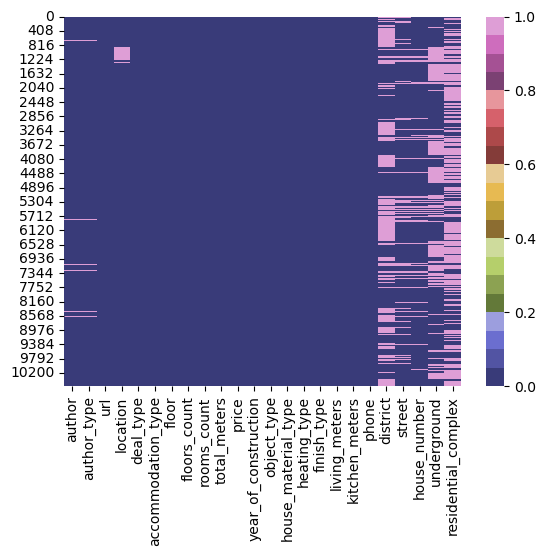

In [12]:
sns.heatmap(df.isnull(),cmap='tab20b')

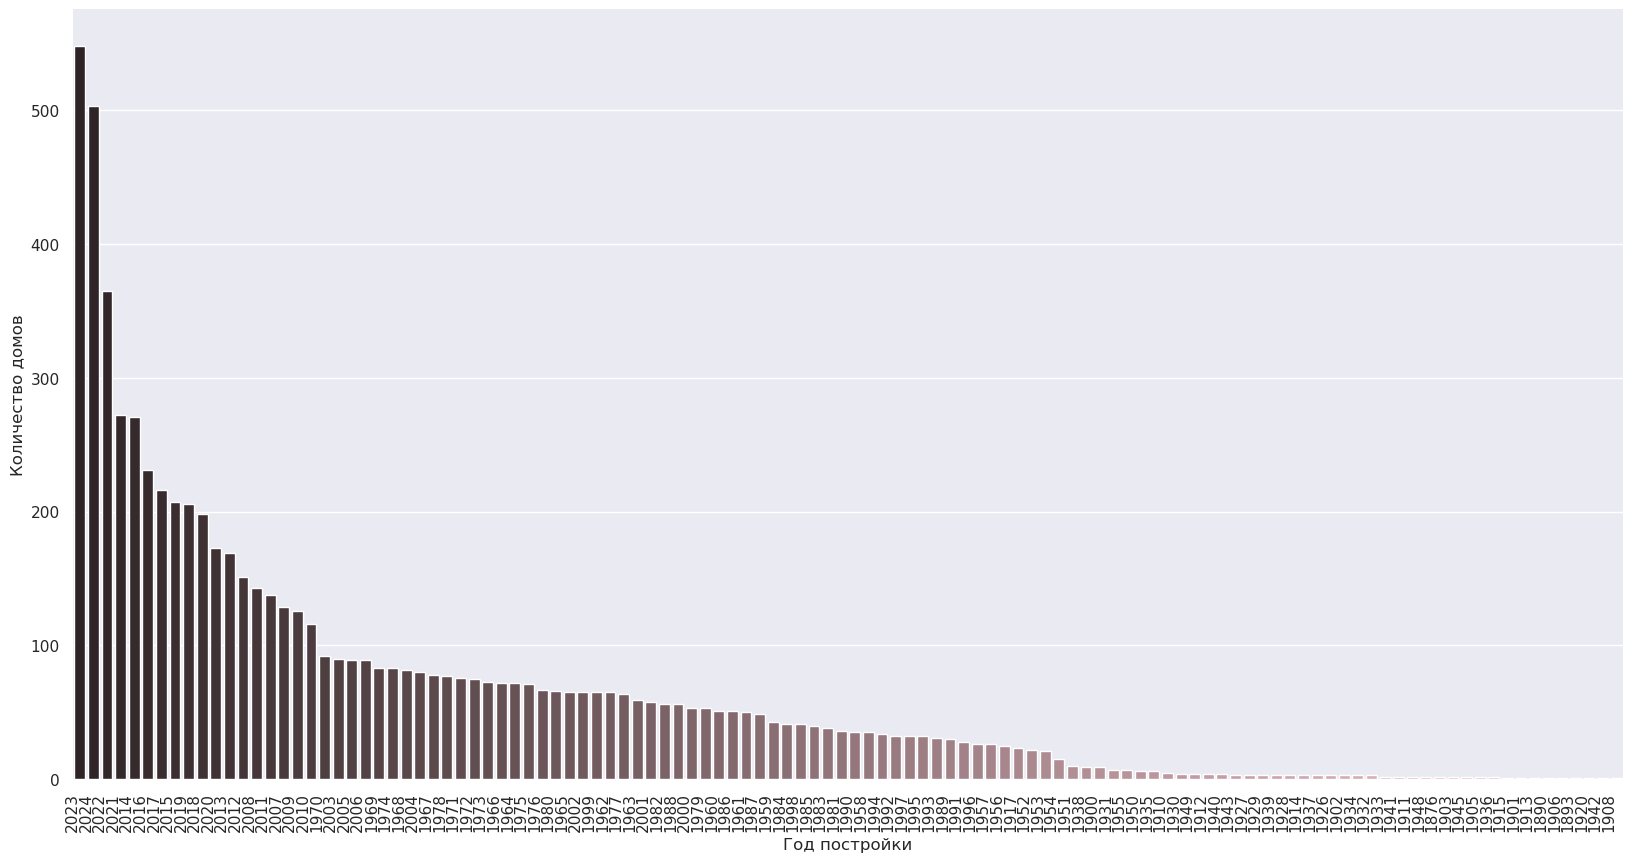

In [23]:
# df['year_of_construction'].value_counts().to_csv('years_count.csv')

info_for_year = pd.read_csv('years_count.csv')
plt.subplots(figsize=(20,10))
plot = sns.barplot(x='year_of_construction', y='count', data=info_for_year, palette='dark:pink', orient='v', order= info_for_year['year_of_construction'])
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha='right')
sns.despine(left=True, bottom=True)
plt.show()

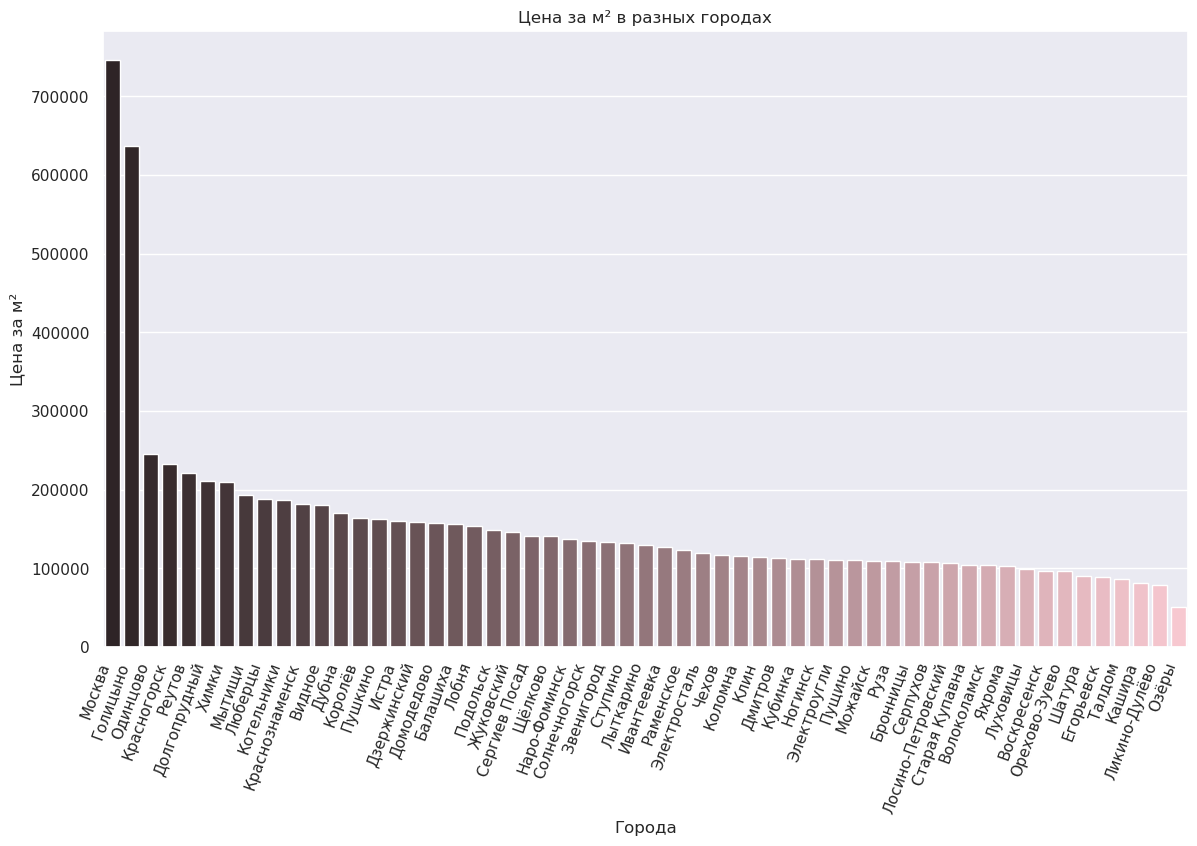

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=info, color='pink')
plt.title('Цена за м² в разных городах')
plt.xlabel('Города')
plt.ylabel('Цена за м²')
plt.xticks(rotation=70, ha='right')
plt.show()

In [28]:
from sklearn import preprocessing
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,3517,3,8982,31,0,0,5.0,7.0,1.0,34.6,...,-1.0,1,226,356,7.985041e+10,176,900,1054,337,1216
1,3358,3,7804,31,0,0,14.0,45.0,1.0,41.3,...,-1.0,2,259,24,7.964559e+10,132,1445,1493,171,86
2,2405,0,7704,31,0,0,10.0,12.0,1.0,34.4,...,-1.0,9,44,21,7.499716e+10,159,1707,1127,230,20
3,20,3,7451,31,0,0,4.0,33.0,1.0,42.9,...,-1.0,1,281,64,7.965188e+10,148,236,124,4,185
4,3143,4,6884,31,0,0,1.0,16.0,1.0,37.7,...,-1.0,1,0,0,7.916094e+10,224,1056,226,229,1216


<Axes: >

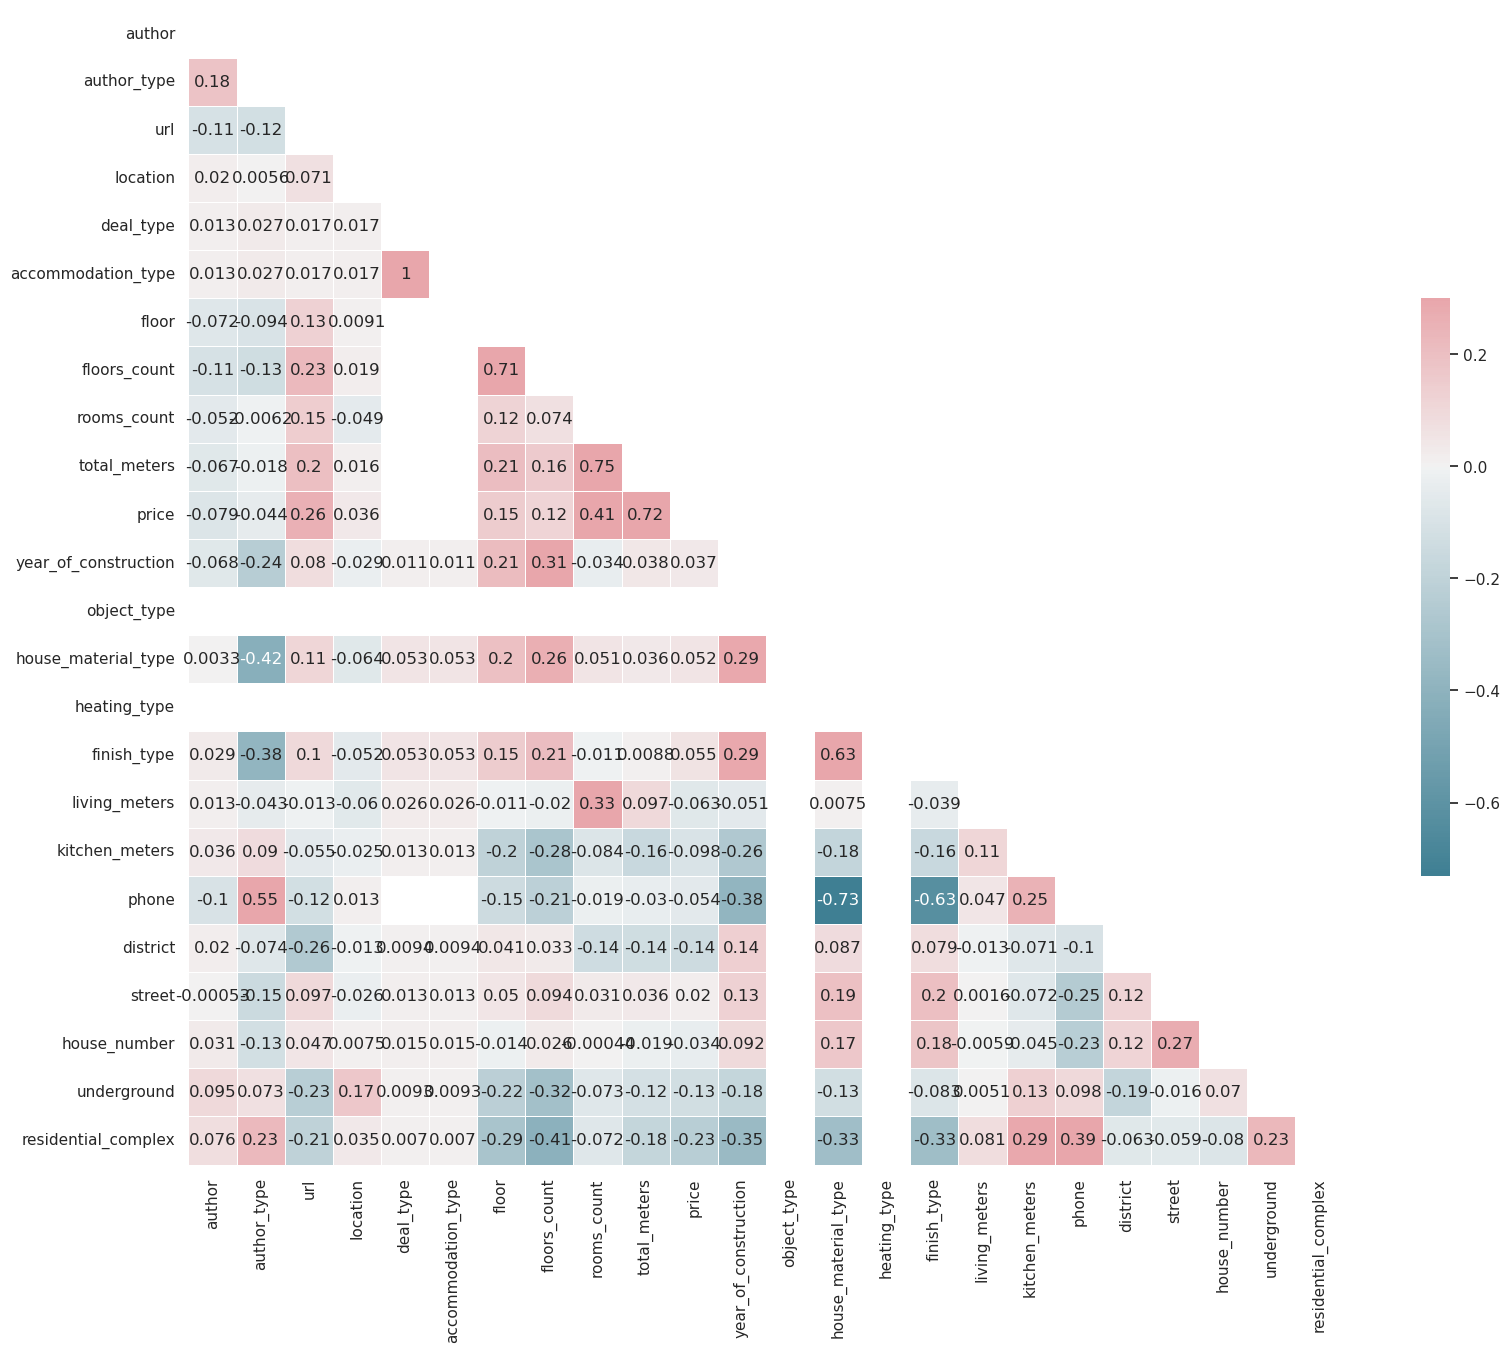

In [35]:
sns.set(style="white")

# Generate a large random dataset
temp3 = encoded_data.copy()

# Compute the correlation matrix
corr = temp3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #удалить там где 1 одну из колонок потому что несут 1 и тоже знч

In [ ]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']): #цикл для колонок
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=1.5, color='pink') #тут мы видим влияение класса пассажира, количество братьев и сестер, количество родителей и детей на выживаемость